## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.85, 0.75, 0.65, 0.55]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 20ms/step - loss:

196/196 [==============================] - 3s 17ms/step - loss: 0.3785 - accuracy: 0.8659 - val_loss: 2.2482 - val_accuracy: 0.5287
Experiment with MOMENTUM = 0.850000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________

196/196 [==============================] - 4s 19ms/step - loss: 0.5582 - accuracy: 0.8050 - val_loss: 1.9290 - val_accuracy: 0.4819
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 0.5645 - accuracy: 0.8014 - val_loss: 1.7877 - val_accuracy: 0.5050
Experiment with MOMENTUM = 0.750000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output

196/196 [==============================] - 4s 23ms/step - loss: 0.7840 - accuracy: 0.7238 - val_loss: 1.3983 - val_accuracy: 0.5346
Epoch 49/50
196/196 [==============================] - 4s 22ms/step - loss: 0.7688 - accuracy: 0.7295 - val_loss: 1.6170 - val_accuracy: 0.4948
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7589 - accuracy: 0.7335 - val_loss: 1.4626 - val_accuracy: 0.5345
Experiment with MOMENTUM = 0.650000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________________

Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9302 - accuracy: 0.6740 - val_loss: 1.3557 - val_accuracy: 0.5282
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9176 - accuracy: 0.6792 - val_loss: 1.4578 - val_accuracy: 0.5122
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9046 - accuracy: 0.6836 - val_loss: 1.3886 - val_accuracy: 0.5254
Experiment with MOMENTUM = 0.550000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.0439 - accuracy: 0.6335 - val_loss: 1.5125 - val_accuracy: 0.4840
Epoch 48/50
196/196 [==============================] - 4s 23ms/step - loss: 1.0355 - accuracy: 0.6376 - val_loss: 1.5625 - val_accuracy: 0.4874
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 1.0183 - accuracy: 0.6445 - val_loss: 1.4647 - val_accuracy: 0.5014
Epoch 50/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0144 - accuracy: 0.6458 - val_loss: 1.4880 - val_accuracy: 0.4891


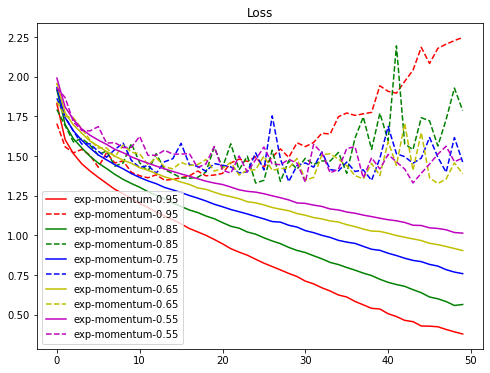

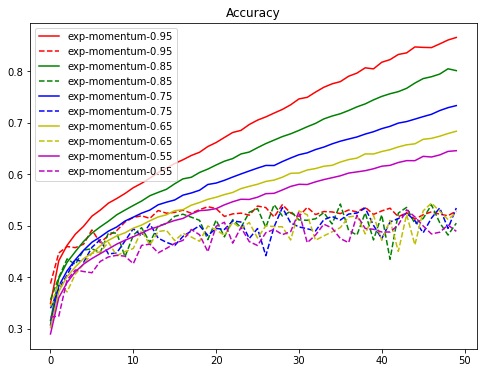

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
# without nesterov

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss:

196/196 [==============================] - 4s 21ms/step - loss: 0.6179 - accuracy: 0.7779 - val_loss: 1.6957 - val_accuracy: 0.5269
Experiment with MOMENTUM = 0.850000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________

Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6172 - accuracy: 0.7818 - val_loss: 1.6988 - val_accuracy: 0.5123
Experiment with MOMENTUM = 0.750000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params

196/196 [==============================] - 3s 16ms/step - loss: 0.7762 - accuracy: 0.7277 - val_loss: 1.4449 - val_accuracy: 0.5411
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 0.7653 - accuracy: 0.7310 - val_loss: 1.4093 - val_accuracy: 0.5487
Experiment with MOMENTUM = 0.650000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output

196/196 [==============================] - 3s 17ms/step - loss: 0.9084 - accuracy: 0.6847 - val_loss: 1.4320 - val_accuracy: 0.5201
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8914 - accuracy: 0.6892 - val_loss: 1.3748 - val_accuracy: 0.5332
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8857 - accuracy: 0.6910 - val_loss: 1.4776 - val_accuracy: 0.5096
Experiment with MOMENTUM = 0.550000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________________

196/196 [==============================] - 3s 16ms/step - loss: 0.9998 - accuracy: 0.6497 - val_loss: 1.4394 - val_accuracy: 0.5023
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9864 - accuracy: 0.6538 - val_loss: 1.7003 - val_accuracy: 0.4489
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9858 - accuracy: 0.6545 - val_loss: 1.4061 - val_accuracy: 0.5096
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9670 - accuracy: 0.6612 - val_loss: 1.4037 - val_accuracy: 0.5216


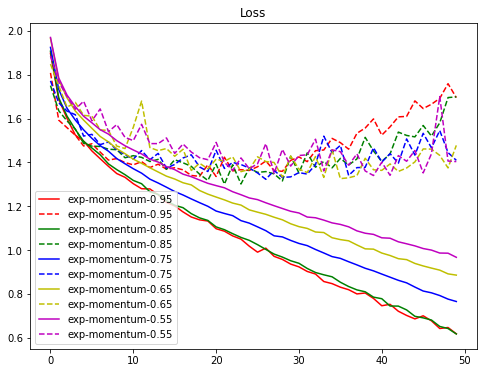

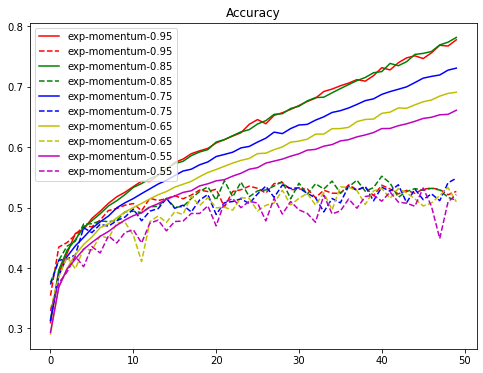

In [13]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()